# TM. Assignment 2. Sentence-level Sentiment Analysis in Twitter/X.

## Objectives
- Learn how to load and use SA models from [HuggingFace Hub](https://huggingface.co/models).
- Evaluate the performance of sentence-level SA systems on a real dataset ([SemEval-2017 Task 4: Sentiment Analysis in Twitter](https://github.com/leelaylay/TweetSemEval/tree/master/dataset/)).
- Process a subset of tweets about a particular topic.
- Explore and visualize the results of sentiment analysis.



---



## **TASK 0.** Basic usage of HuggingFace's models
1. Install dependencies:

In [ ]:
!pip install -q sentencepiece
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00


2. Run sentiment analysis predictions by using Pipeline:

In [ ]:
# Using pipeline class to make predictions from models available in the Hub in an easy way
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

3. Use a specific sentiment analysis model available on the Hub by specifying its name:

In [ ]:
# Using a specific model for sentiment analysis
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.9916695356369019},
 {'label': 'NEG', 'score': 0.9806600213050842}]



---



## **TASK 1.** Evaluate three SA models
It is highly recommended to perform this task on Google Colab, since the evaluated models require GPUs to perform SA.

The evaluation script can be found at https://github.com/cardiffnlp/tweeteval/blob/main/evaluation_script.py. The easiest way to evaluate the SA models is by downloading/cloning project [tweeteval](https://github.com/cardiffnlp/tweeteval). In particular, in folder "datasets/sentiment", file [test_labels.txt](https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/test_labels.txt) contains test gold labels following the ouput format followed by the evaluation script. In addition, the predicted output must be located in  folder "predictions" and named as "sentiment.txt". Then, the evaluation can be performed by running:

python evaluation_script.py --tweeteval_path ./datasets/ --predictions_path ./predictions/ --task sentiment

Please note that the evaluation script is defined to use labels 0, 1 and 2 instead of negative, neutral and positive (which may differ to the output of some SA models). Feel free to modify the original evaluation script if required.

It is also worth mentioning that, if you are using Google Colab, the evaluation script should be uploaded to your Google Drive, so that it can be used in your notebook.

In [ ]:
# Download the dataset
!git clone https://github.com/cardiffnlp/tweeteval.git

Cloning into 'tweeteval'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 370 (delta 13), reused 3 (delta 1), pack-reused 354
Receiving objects: 100% (370/370), 8.49 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [ ]:
# Check that it is working properly
!python tweeteval/evaluation_script.py --tweeteval_path ./tweeteval/datasets/ --predictions_path ./tweeteval/predictions/ --task sentiment

0 {'precision': 0.7042758003134094, 'recall': 0.7920443101711984, 'f1-score': 0.745585969901647, 'support': 3972}
1 {'precision': 0.7428414096916299, 'recall': 0.6816574027286508, 'f1-score': 0.7109354413702241, 'support': 5937}
2 {'precision': 0.7138032925284931, 'recall': 0.712, 'f1-score': 0.7129005059021922, 'support': 2375}
accuracy 0.7232171930967112
macro avg {'precision': 0.7203068341778441, 'recall': 0.7285672376332831, 'f1-score': 0.7231406390580212, 'support': 12284}
weighted avg {'precision': 0.7247570618641517, 'recall': 0.7232171930967112, 'f1-score': 0.7225195286048575, 'support': 12284}
------------------------------
TweetEval Score (sentiment): 0.7285672376332831


In [ ]:
# Load the test sentences
with open("tweeteval/datasets/sentiment/test_text.txt") as f:
  test_input = [line.strip() for line in f]

print("Number of sentences:", len(test_input))

Number of sentences: 12284


In [ ]:
# BERTweet model
model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
prediction_to_label = {"NEG": "0", "NEU": "1", "POS": "2"}
outputs = model(test_input)

with open("./tweeteval/predictions/sentiment.txt", 'w') as f:
  for output in outputs:
    label = prediction_to_label[output["label"]]
    f.write(label + "\n")

!python tweeteval/evaluation_script.py --tweeteval_path ./tweeteval/datasets/ --predictions_path ./tweeteval/predictions/ --task sentiment

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


0 {'precision': 0.7075852782764811, 'recall': 0.7938066465256798, 'f1-score': 0.7482202183198859, 'support': 3972}
1 {'precision': 0.7461003570757376, 'recall': 0.6686878895064847, 'f1-score': 0.7052762480014212, 'support': 5937}
2 {'precision': 0.6900678101316314, 'recall': 0.728421052631579, 'f1-score': 0.7087259319950839, 'support': 2375}
accuracy 0.7206935851514165
macro avg {'precision': 0.71458448182795, 'recall': 0.7303051962212478, 'f1-score': 0.7207407994387971, 'support': 12284}
weighted avg {'precision': 0.7228132199882336, 'recall': 0.7206935851514165, 'f1-score': 0.7198290361477816, 'support': 12284}
------------------------------
TweetEval Score (sentiment): 0.7303051962212478


For each sentiment class (0, 1, 2 represent negative, neutral and positive sentiment, respectively) we obtain the following metrics:
- Precision: proportion of correctly identified sentiments among all predicted sentiments for that class. Higher precision means fewer false positives for that class.
- Recall: proportion of correctly identified sentiments among all actual sentiments for that class. Higher recall means fewer false negatives for that class.
- F1 score: harmonic mean of precision and recall; provides a balance between the two metrics.  

In addition, accuracy measures the overall correctness of predictions made by the model across all sentiment classes (negative, neutral, positive).

We also have the "macro average" and the "weighted average" of the three metrics mentioned before. The macro average treats all classes equally, calculating metrics independently and taking an unweighted mean, while the weighted average considers class sizes, calculating a mean weighted by the support of each class, reflecting the performance considering class imbalances.





**BERTweet**
- Precision: slightly higher for class 1 compared to the other classes, with a difference of about 0.04.
- Recall: higher for class 0 (negative sentiment) and comparatively lower for class 1 (neutral sentiment).
- F1 score: remains almost constant for classes 1 and 2, with a slight increase for class 0 (negative sentiment).

The model shows greater performance in accurately classifying neutral sentiments. However, neutral sentiments are also those where the model tends to miss a larger portion of the true cases.

The slight improvement in F1 score for class 0 suggests slightly better performance in capturing negative sentiment without compromising accuracy.

In [ ]:
# RoBERTa model
model = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
prediction_to_label = {"LABEL_0": "0", "LABEL_1": "1", "LABEL_2": "2"}
outputs = model(test_input)

with open("./tweeteval/predictions/sentiment.txt", 'w') as f:
  for output in outputs:
    label = prediction_to_label[output["label"]]
    f.write(label + "\n")

!python tweeteval/evaluation_script.py --tweeteval_path ./tweeteval/datasets/ --predictions_path ./tweeteval/predictions/ --task sentiment

(…)-base-sentiment/resolve/main/config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

(…)a-base-sentiment/resolve/main/vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

(…)a-base-sentiment/resolve/main/merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

(…)ent/resolve/main/special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

0 {'precision': 0.7090826314591395, 'recall': 0.7842396777442094, 'f1-score': 0.7447698744769874, 'support': 3972}
1 {'precision': 0.7393731988472623, 'recall': 0.6914266464544383, 'f1-score': 0.7145965706327793, 'support': 5937}
2 {'precision': 0.7178281316802052, 'recall': 0.7069473684210527, 'f1-score': 0.7123462028001697, 'support': 2375}
accuracy 0.7244382937154021
macro avg {'precision': 0.7220946539955357, 'recall': 0.7275378975399002, 'f1-score': 0.7239042159699788, 'support': 12284}
weighted avg {'precision': 0.7254132779593281, 'recall': 0.7244382937154021, 'f1-score': 0.723917943090183, 'support': 12284}
------------------------------
TweetEval Score (sentiment): 0.7275378975399002


**RoBERTa**
- Precision: remains relatively consistent across all classes, being class 1 slightly better classified.
- Recall: significantly higher for class 0 compared to classes 1 and 2, indicating better identification of negative sentiment.
- F1 score: slight improvement for class 0, reflecting a more balanced performance in capturing negative sentiment.


In [ ]:
# XLM-RoBERTa
model = pipeline(model="cardiffnlp/twitter-xlm-roberta-base-sentiment")
outputs = model(test_input)

prediction_to_label = {"negative": "0", "neutral": "1", "positive": "2"}
with open("./tweeteval/predictions/sentiment.txt", 'w') as f:
  for output in outputs:
    label = prediction_to_label[output["label"]]
    f.write(label + "\n")

!python tweeteval/evaluation_script.py --tweeteval_path ./tweeteval/datasets/ --predictions_path ./tweeteval/predictions/ --task sentiment

0 {'precision': 0.614959928762244, 'recall': 0.8693353474320241, 'f1-score': 0.7203504746010222, 'support': 3972}
1 {'precision': 0.7704840613931523, 'recall': 0.549604177193869, 'f1-score': 0.6415650806134486, 'support': 5937}
2 {'precision': 0.6824157764995892, 'recall': 0.6993684210526315, 'f1-score': 0.6907881056352672, 'support': 2375}
accuracy 0.681943992184956
macro avg {'precision': 0.6892865888849952, 'recall': 0.7061026485595082, 'f1-score': 0.6842345536165793, 'support': 12284}
weighted avg {'precision': 0.7031685264344922, 'recall': 0.681943992184956, 'f1-score': 0.6765569618691848, 'support': 12284}
------------------------------
TweetEval Score (sentiment): 0.7061026485595082


**XLM-RoBERTa**

- Precision: highest for class 1 by a huge difference, followed by class 2 and then class 0.
- Recall: notable increase for negative sentiment (class 0), along with a significant decrease for neutral and positive sentiment (classes 1 and 2).
- F1 score: slightly higher for class 0, closely followed by class 2 and finally class 1.

This could indicate a specialization in identifying negative sentiment at the expense of neutral and positive ratings. Although the model is more precise in identifying neutral tweets, it may miss some neutral tweets compared to negative sentiment tweets, which it captures better. It should be noted that the low precision and high recall for negative tweets may indicate a bias towards negative samples i.e. tends to classify as negative even if it is not.

In [ ]:
model = pipeline(model="cardiffnlp/roberta-base-tweet-sentiment-en")
prediction_to_label = {"negative": "0", "neutral": "1", "positive": "2"}
outputs = model(test_input)

with open("./tweeteval/predictions/sentiment.txt", 'w') as f:
  for output in outputs:
    label = prediction_to_label[output["label"]]
    f.write(label + "\n")

!python tweeteval/evaluation_script.py --tweeteval_path ./tweeteval/datasets/ --predictions_path ./tweeteval/predictions/ --task sentiment

0 {'precision': 0.614257282431699, 'recall': 0.8547331319234642, 'f1-score': 0.7148120854826823, 'support': 3972}
1 {'precision': 0.7709308372334893, 'recall': 0.4994104766717197, 'f1-score': 0.6061535316365123, 'support': 5937}
2 {'precision': 0.6090690484369632, 'recall': 0.7465263157894737, 'f1-score': 0.6708286038592508, 'support': 2375}
accuracy 0.6620807554542494
macro avg {'precision': 0.6647523893673838, 'recall': 0.7002233081282192, 'f1-score': 0.6639314069928152, 'support': 12284}
weighted avg {'precision': 0.6889763347860406, 'recall': 0.6620807554542494, 'f1-score': 0.6537923359678369, 'support': 12284}
------------------------------
TweetEval Score (sentiment): 0.7002233081282192


**RoBERTa-EN**
- Precision: highest for class 1, followed by a nearly equal precision for class 0 and class 2.
- Recall: significantly lower for class 1 compared to the other classes.
- F1 score: class 0 ranks the highest, followed by class 2, and lastly, class 1.

The model shows higher precision in identifying tweets labeled as neutral, indicating fewer false positives for this class. However, this precision has a downside: a noticeable drop in recall, meaning it could miss a significant portion of actual neutral tweets. The F1 score suggests a more balanced performance in capturing negative and positive feelings. As in the case of XLM-RoBERTa, the high recall and low precision may indicate a bias in the model.

The following tables provide a comparative analysis of the performance of the four models.

In the first table we can see the precision, recall and F1-score for each sentiment class (0, 1, 2) as well as the accuracy and TweetEval score for the four different sentiment analysis models.

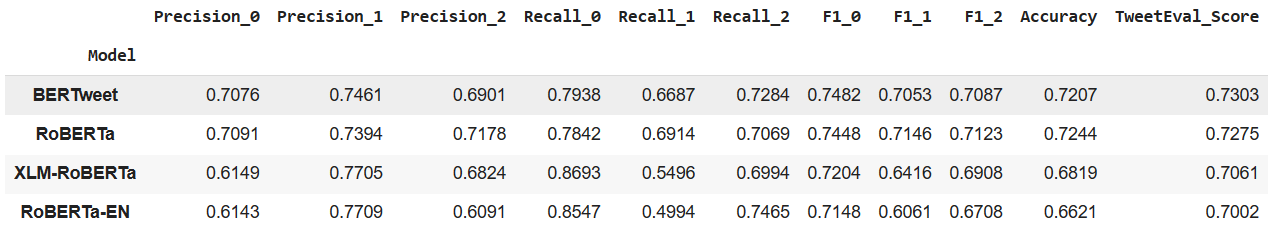

Overall, BERTweet and RoBERTa seem stronger at identifying sentiments across the board, showing the best F1-score for all the classes. Whilst, XLM-RoBERTa excels in negative sentiments but falls behind in others. RoBERTa-EN particularly struggles in the neutral classification.

In addition, XLM-RoBERTa and RoBERTa-EN demonstrate lower overall accuracy and TweetEval scores compared to the other models.

Overall, the best TweetEval score is achieved by BERTweet with a score of 0.7303, while the best accuracy is obtained by RoBERTa with a value of 0.7244. The best F1-scores are also shared between these two models. While the former obtains the best score for the negative class (0.7482), the latter surpasses it in the neutral and positive classes (0.7146 and 0.7123, respectively).


This second table shows the macro and weighted average metrics across the models.

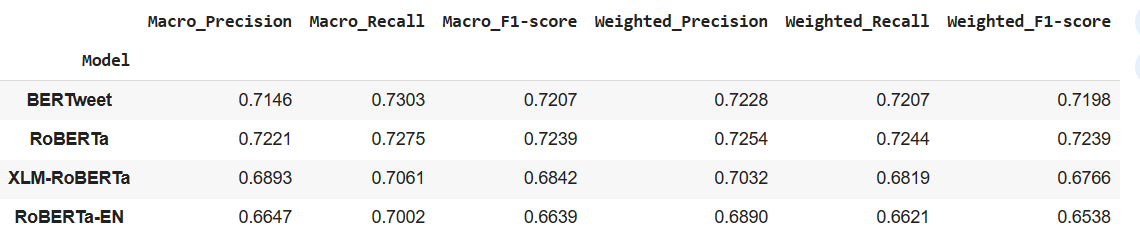

Given the disparity in support for sentiment classes (3972 for class 0 (negative sentiment), 5937 for class 1 (neutral), and 2375 for class 2 (positive), we are going to focus on the weighted average metrics. In this way we obtain an understanding of the models taking into account their respective frequencies in the data set.

Again, BERTweet and RoBERTa exhibit strong performance, showing competitive average precision and recall. XLM-RoBERTa shows lower precision and recall in comparison, indicating potential limitations in accurately identifying sentiments across categories. RoBERTa-EN performs even more poorly, presenting weaker metrics than the XLM-RoBERTa model. This suggests notable challenges in sentiment classification across the board.

Overall, RoBERTa would obtain the best precision, recall and F1-score.

Given these insights, we have decided to use the BERTweet model to follow with the experiments, due to the fact that the weighted metrics are very similar to RoBERTa ones and the TweetEval score is higher. Therefore, we have focused on this last score because we consider it more important for the specific task to be solved, while precision, recall and f1-score are more general-purpose oriented i.e. it can be used for any classification task.



---



## TASK 2. Analyze some tweets about three specific topics

For this task, the code located at the end of this [tutorial](https://huggingface.co/blog/sentiment-analysis-python#4-analyzing-tweets-with-sentiment-analysis-and-python) can be useful.

In [ ]:
# Download and read the dataset
!wget https://raw.githubusercontent.com/leelaylay/TweetSemEval/master/dataset/train/twitter-2016train-A.txt

dataset = []
with open("twitter-2016train-A.txt") as f:
  for line in f:
    _, _, sentence = line.strip().split("\t")
    dataset.append(sentence)

print("Number of sentences:", len(dataset))

--2023-11-17 22:46:01--  https://raw.githubusercontent.com/leelaylay/TweetSemEval/master/dataset/train/twitter-2016train-A.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 864760 (844K) [text/plain]
Saving to: ‘twitter-2016train-A.txt’

twitter-2016train-A 100%[===================>] 844.49K  --.-KB/s    in 0.04s   

2023-11-17 22:46:01 (20.3 MB/s) - ‘twitter-2016train-A.txt’ saved [864760/864760]

Number of sentences: 6000


Given the metrics from the previous task, we use the BERTweet model for this task.

In [ ]:
# Load the model
model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
prediction_to_label = {"NEG": "0", "NEU": "1", "POS": "2"}

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_pie_results(outputs):
  n_neg = sum(1 for output in outputs if output['label'] == "NEG")
  n_neu = sum(1 for output in outputs if output['label'] == "NEU")
  n_pos = sum(1 for output in outputs if output['label'] == "POS")

  plt.pie([n_neg, n_neu, n_pos], labels=["negative", "neutral", "positive"], autopct='%1.1f%%', startangle=90)
  plt.axis('equal')
  plt.show()

def plot_word_cloud(dataset, outputs, topic):
  polarity_to_label = {"negative": "NEG", "neutral": "NEU", "positive": "POS"}

  for polarity in ["negative", "neutral", "positive"]:
    tweets_polarity = [
        tweet for i, tweet in enumerate(dataset)
        if outputs[i]["label"] == polarity_to_label[polarity]
      ]

    text = ' '.join(tweets_polarity)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Remarkable words for a {polarity} polarity on {topic} topic")
    plt.show()

Number of sentences: 243


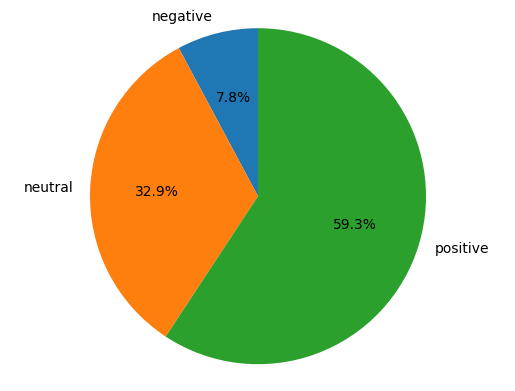

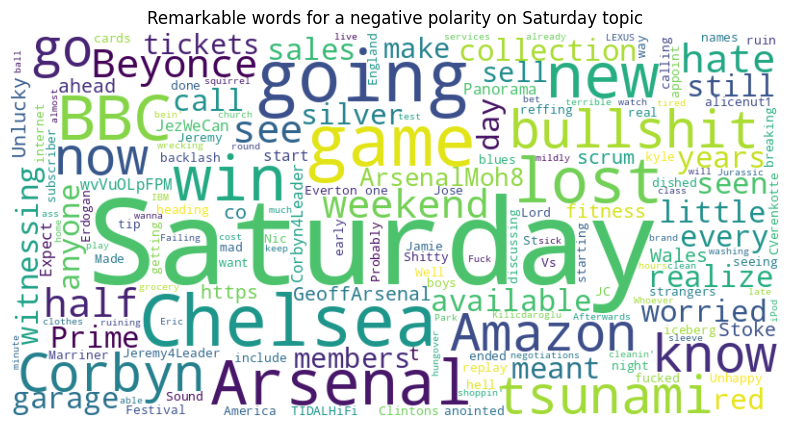

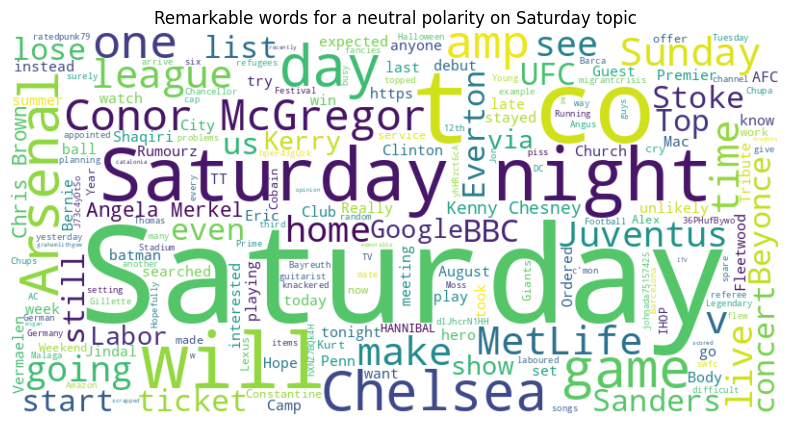

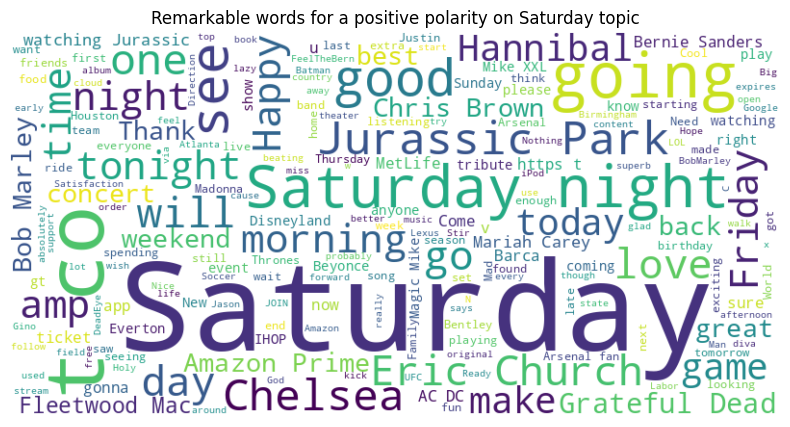

In [ ]:
filtered_dataset = [tweet for tweet in dataset if "saturday" in tweet.lower()]
print("Number of sentences:", len(filtered_dataset))
outputs = model(filtered_dataset)
plot_pie_results(outputs)
plot_word_cloud(filtered_dataset, outputs, topic="Saturday")

A large portion of the tweets, almost 60%, expressed positive sentiment. This indicates a predominant positive association with the term "Saturday" in the tweets. Negative sentiments were the least represented, approximately 8%, showing relatively less negativity associated with the term.

- Negative tweets mention topics related to sports (e.g. "Chelsea", "Arsenal", "reffing", "Marriner"), news (e.g. "BBC"), or politcs ("Erdogan", "Corbyn", "JezWeCan"). There are also present some negative words such as "bullshit", "hate" "unlucky", "ruining", "failing", "fucked", "unhappy", "worried", "sick"; and words related to shows or performances such as "tickets", "Beyonce", "sales", "scrum", "live", "Festival", "sound". Probably, both sports and politics are due to controversial facts occurred along the week while the shows/performance ones have more to do with a specific show held at the specific moment of building the dataset.

- Neutral tweets appear to focus on general observations, personalities (e.g. "Conor McGregor") and vague references to activities or events. There are also some sport-related terms (e.g. "Chelsea", "Juventus", "league", "lose", "game", "UFC", "Everton", "Shaquiri", "Vermaelen", "stadium, "MetLife"), some politics-related ones (e.g. "Angela Merkel, "Labor") and some related to festivals (e.g. "Beyonce", "concert", "ticket", "Kenny Chesney")

- Positive tweets reflect feelings related to enjoying Saturday nights and expressing happiness. They also make references to past or upcoming events like "Fridays" or "Sunday" and "tonight" or mention movies like "Jurassic Park" or "Hannibal". There are some singers present such as "Bob Marley", "Mariah Carey", "Madonna", "Chris Brown" or "Beyonce". There are positive words such as "thank", "satisfaction", "nice", "grateful", "love", "great", "hope", "better" or "best".

In general, we see three main topics: sports, music and politics. The first one is present in the three type of sentiments, but has a larger presence in the negative one. The same occurs with politics. In the contrary, music has a strong influence in the positive sentiment, as well as movies.

Number of sentences: 103


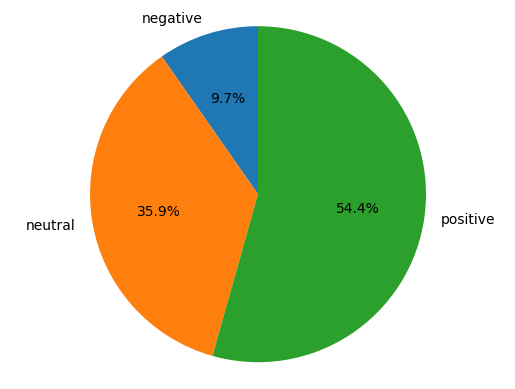

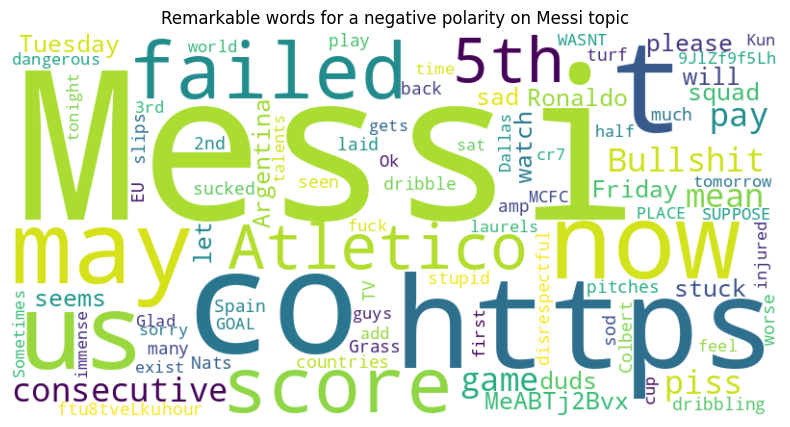

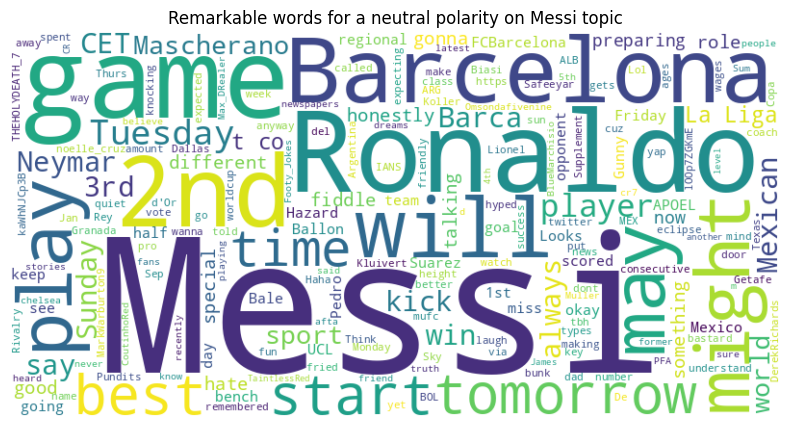

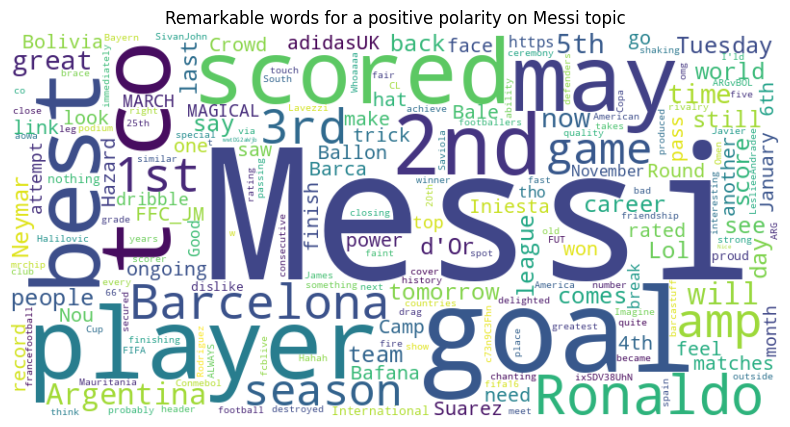

In [ ]:
filtered_dataset = [tweet for tweet in dataset if "messi" in tweet.lower()]
print("Number of sentences:", len(filtered_dataset))
outputs = model(filtered_dataset)
plot_pie_results(outputs)
plot_word_cloud(filtered_dataset, outputs, topic="Messi")

The distribution of sentiment on the topic "Messi" shows a majority of tweets with positive sentiment, representing 54.4%. This is followed by a notable portion of neutral tweets, around 35.9%. Negative sentiments constitute a smaller fraction, around 9.7% of the analyzed data set. In general, feelings are predominantly positive or neutral.

- Negative feelings reflect discussions of sporting matches with words like "failed", "score" and "us." Negative words such as "bullshit", "sad", "sucked" or "piss" are frequent. We also observe a very frequent "5th" word, probably related to his 5th position in the Ballon d'Or 2018.

- Neutral sentiments seem to revolve around generic football-related terms such as "game" or "play", names of prominent players such as "Ronaldo", "Mascherano" or "Neymar" and teams such as "Barcelona".

- Positive feelings emphasize achievements and success, mentioning terms such as "scored" or "goal" and positive statements about players, with the terms "Ronaldo" and "Barcelona" appearing again. Positive words such as "great" have more presence now, and also positions such as "1st" indicating the best player in the world.

In general, we see that the main words surrounding "Messi" topic is another player's names, specially Ronaldo, teams such as "Barcelona" and "Argentina", or positions like "1st", "2nd", "3rd", "5th"... For the positive sentiment we see more positive words and better positions, while for the negative sentiment there are more negative words and worse positions.

Number of sentences: 101


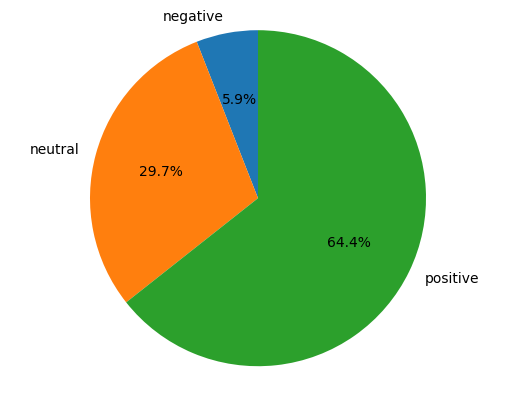

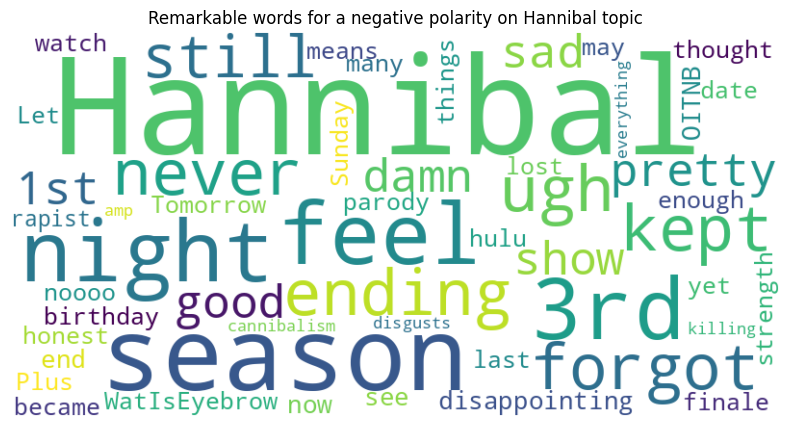

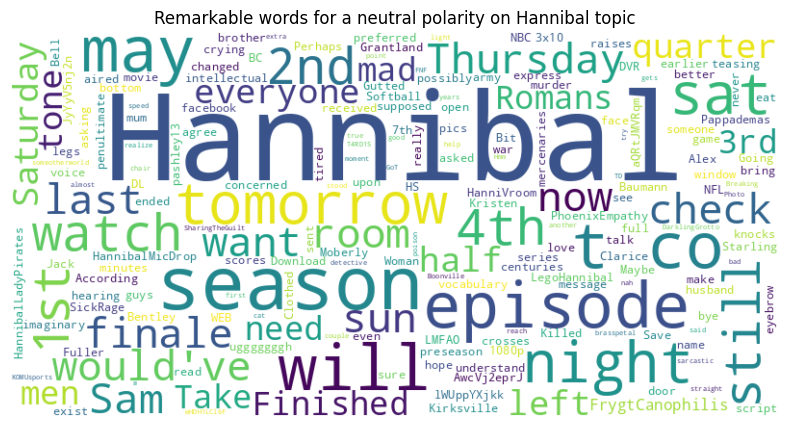

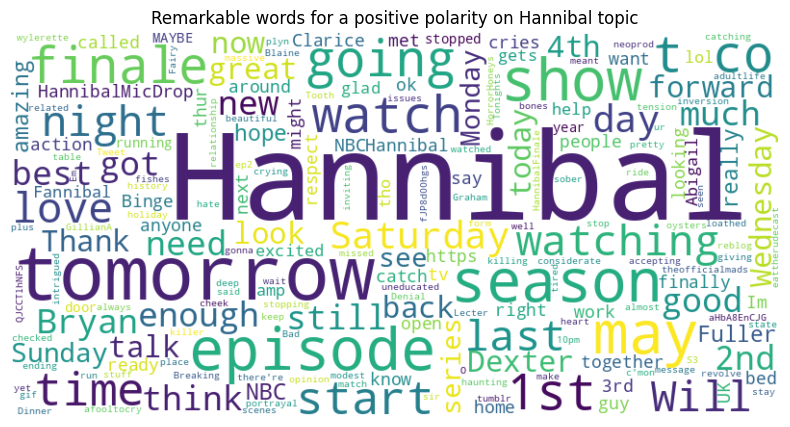

In [ ]:
filtered_dataset = [tweet for tweet in dataset if "hannibal" in tweet.lower()]
print("Number of sentences:", len(filtered_dataset))
outputs = model(filtered_dataset)
plot_pie_results(outputs)
plot_word_cloud(filtered_dataset, outputs, topic="Hannibal")

For the topic "Hannibal", the distribution of feelings shows a clear majority of positive feelings, 64.4%, followed by 29.7% of neutral feelings and a small fraction of 5.9% of negative feelings.

- Negative: they reflect emotions and negative aspects related to the content of the program, covering terms such as "ugh", "sad", "disappointing", and "never". There are also some other words that may indicate negative opinions such as "parody", "pretty" (probably followed by a bad adjective) or "good" (probably after a "not very" or similar)

- Neutral: focus on specific time mentions such as "Thursday", "Satudary", "night", "tomorrow" and the intention to watch the program e.g. "watch", "want", "season", "episode", "quarter".

- Positive: highlight excitement with words like "end", "watch" and "continue", which indicate anticipation for upcoming episodes and enjoyment of the series e.g. "forward", "going", "watching". Words such as "best", "love", "great", "good".

For this topic, we observed expected words for a movie, with negative adjectives for the negative sentiment, and positive adjectives for the positive sentiment along with "call to the action" verbs indicating the intention to start or continue watching it.

Number of sentences: 102


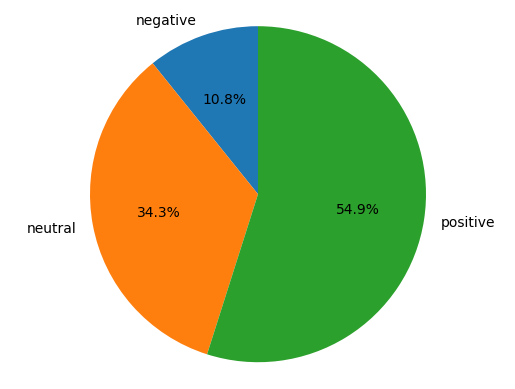

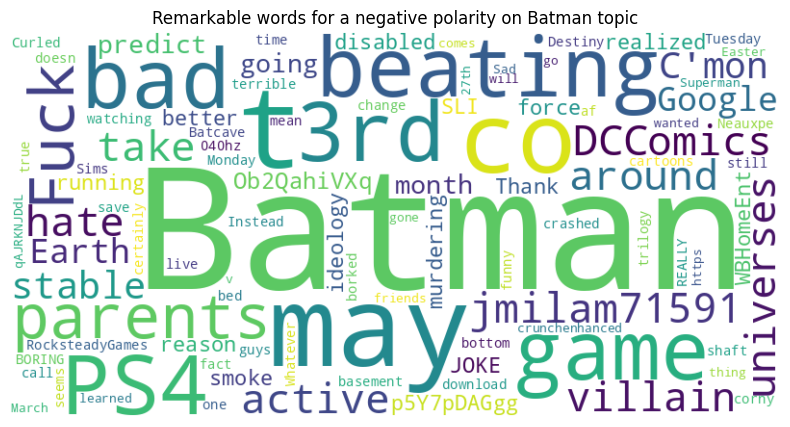

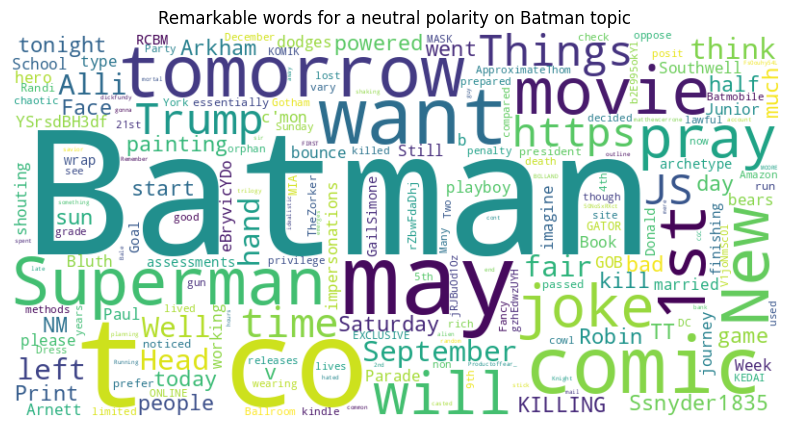

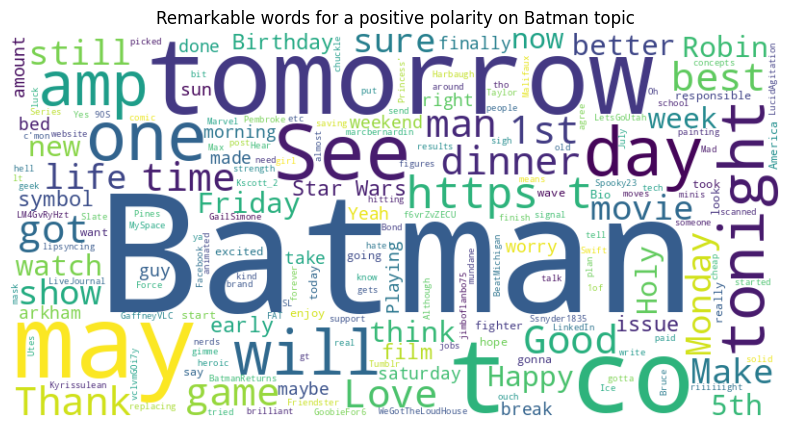

In [ ]:
filtered_dataset = [tweet for tweet in dataset if "batman" in tweet.lower()]
print("Number of sentences:", len(filtered_dataset))
outputs = model(filtered_dataset)
plot_pie_results(outputs)
plot_word_cloud(filtered_dataset, outputs, topic="Batman")


The sentiment distribution around the topic "Batman" shows a predominant positive sentiment, followed by a significant neutral sentiment and a smaller negative sentiment.

- Negative feelings, representing 10.8%, contain terms associated with potential adversities like "beating" or "bad" along with references to villains, game consoles ("PS4"), and comics ("DC Comics"). As expected, words such as "hate", "fuck", "disabled" or "terrible" are present.

- Neutral sentiments, accounting for 34.3%, primarily include references to comics and movies (e.g. "Arkham", "movie", "Superman", "Arnett", "Bluth").

- The majority, making up 54.9%, embodies positive feelings. These tweets predominantly express anticipation and excitement about engaging with Batman content in the future. Words such as "watch", "love", "good", "happy", "better", "new", "best" or "yeah" are present.

As with "Hannibal" topic, the results are as expected: negative or positive adjectives for the negative and positive sentiments, respectively, with positive actions for the second.